In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score,accuracy_score

In [14]:
# selecting required columns for our linear regression model
dataset=pd.read_csv('../datasets/modified_season_stats.csv')
stats_2017 = dataset[dataset['Year']>2016]
X = stats_2017[['MP','Age','FG','FT','ORB','AST','PF']]
y=stats_2017['TOV']
X.shape

(595, 7)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [16]:
from sklearn.preprocessing import StandardScaler
Scaler_x=StandardScaler()
scaled_x=Scaler_x.fit_transform(X_train)
Scaler_y=StandardScaler()
scaled_y=Scaler_y.fit_transform(np.array(y_train).reshape(-1,1))

In [17]:
regression_model = linear_model.LinearRegression()
regression_model.fit(scaled_x,scaled_y)

LinearRegression()

In [18]:
print('Intercept:', regression_model.intercept_)
print('Coefficients:', regression_model.coef_)

Intercept: [-1.39733018e-17]
Coefficients: [[-0.25465155 -0.00881848  0.31882715  0.20394752  0.05897131  0.50610951
   0.28437615]]


In [19]:
y_pred = Scaler_y.inverse_transform ((regression_model.predict(Scaler_x.transform(X_test))))

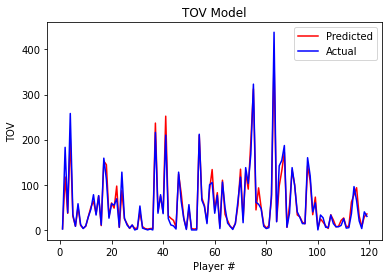

In [20]:
x_for_test=[i+1 for i in range(len(y_test))]
plt.plot(x_for_test,y_pred,color='Red',label="Predicted")
plt.plot(x_for_test,y_test,color='Blue',label="Actual")
plt.xlabel('Player #')
plt.ylabel('TOV')
plt.title('TOV Model')
plt.legend()
plt.show()

In [21]:
r2_score(y_test,y_pred)

0.9522768525770247

In [22]:
mean_squared_error(y_test,y_pred)

240.33314359451956